# Multivariate Analysis & Dimensionality Reduction: PCA, MCA, FAMD & Clustering
This notebook explores and applies dimensionality reduction techniques on the UCI Bank Marketing dataset.
The goal is to:
- Understand and implement **PCA** (Principal Component Analysis)
- Later, extend to **MCA** (Multiple Correspondence Analysis) for categorical data
- And **FAMD** (Factor Analysis of Mixed Data) for mixed types

**Dataset**: UCI Bank Marketing Dataset  
**Techniques**: PCA, MCA, FAMD, Correspondence Analysis, Clustering  
**Tools**: Python (prince, scikit-learn, plotly)

## 1. Import Libraries & Configuration
*Essential packages for multivariate analysis and visualization*

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import prince  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Load and Explore Dataset  
*Import banking data and verify structure*

In [107]:
df = pd.read_csv(r"C:\Users\yasmi\projects\uci_bank_marketing_multivariate_analysis\bank+marketing\bank-additional-full.csv", sep=';')
print(df.shape)
df.head()


(41188, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## 3. Selecting Numerical Variables
PCA only works with numerical variables.
We'll extract the numerical columns and standardize them.

In [108]:
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]
cat_cols =[
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'
]
df_num = df[num_cols]

# Standardize
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_num_scaled.head()


age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494      0.648092   
4  1.533034  0.187888 -0.565922  0.195414 -0.349494      0.648092   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.722722       0.886447    0.71246      0.33168  
1        0.722722       0.886447    0.71246      0.33168  
2        0.722722       0.886447    0.71246      0.33168  
3        0.722722       0.886447    0.71246      0.33168  
4        0.722722       0.886447    0.71246      0.33168

## 4. Applying PCA 

We'll perform PCA on standardized numerical features using the `prince` library.
This helps us identify the main axes of variance in the dataset.


In [109]:
pca = prince.PCA(n_components=5,n_iter=10,rescale_with_mean=True,rescale_with_std=True,random_state=42)
pca = pca.fit(df_num_scaled)
df_pca = pca.transform(df_num_scaled)
df_pca.head()


component         0         1         2         3         4
0         -1.267980  0.890315 -1.488015  0.005825  0.103034
1         -1.278872  0.879321 -1.531299 -0.350193 -0.109513
2         -1.274307  0.420055 -0.324230  0.364118 -0.788097
3         -1.281248  0.469023 -0.495276  0.069054 -0.830913
4         -1.263445  0.904758 -1.495275  0.142061  0.207868

PC1: 38.95%
PC2: 13.59%
PC3: 10.78%
PC4: 10.50%
PC5: 9.29%


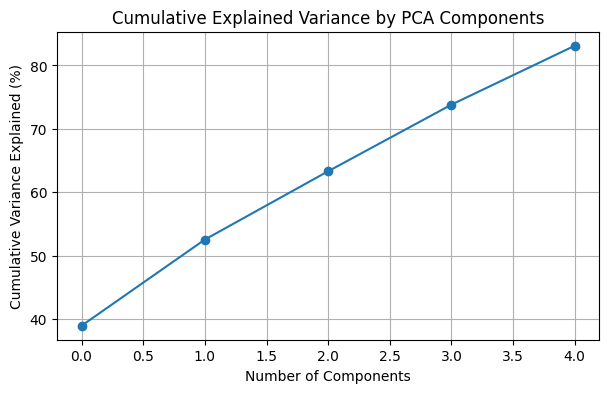

In [110]:
explained_variance = pca.percentage_of_variance_

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}%")

# Scree plot
plt.figure(figsize=(7,4))
plt.plot(pca.cumulative_percentage_of_variance_, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid()
plt.show()


The first five principal components explain approximately 83% of the total variance in the numeric dataset:

PC1: 38.95%

PC2: 13.59%

PC3: 10.78%

PC4: 10.50%

PC5: 9.29%

This indicates that a small number of dimensions (3–5) can summarize most of the information contained in the numeric variables.

The scree plot shows an “elbow” around PC3–PC4, suggesting diminishing returns after that point.

In [111]:

df_vis = df_pca.copy()
df_vis['y'] = df['y']
fig = px.scatter(df_vis, x=0, y=1, color='y',title="PCA Projection (PC1 vs PC2)",labels={'0': 'PC1', '1': 'PC2'})
fig.show()


Each point represents a client projected onto the first two principal components.

The coloring by the target variable (y) shows partial separation between clients who subscribed and those who didn’t.

Although PCA is unsupervised, the visible structure suggests that some numeric features correlate with the likelihood of subscription, meaning there is signal in these variables.

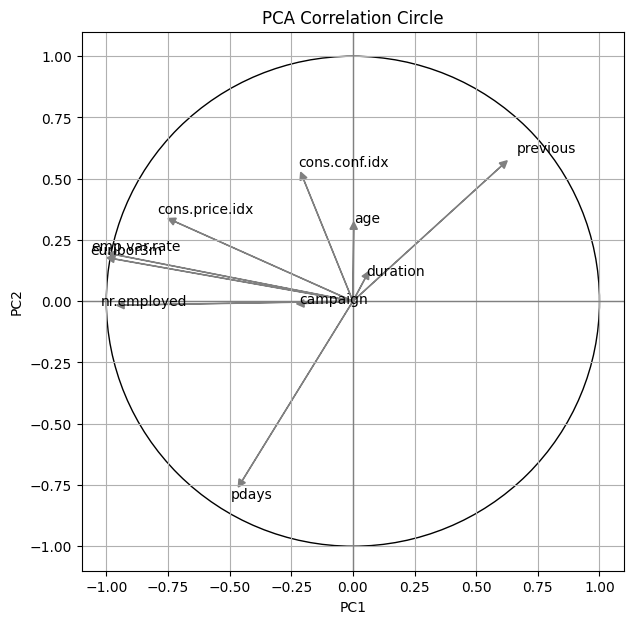

In [112]:
loadings = pca.column_correlations
plt.figure(figsize=(7,7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Draw circle
circle = plt.Circle((0,0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

# Plot variable arrows (PC1 vs PC2)
for i, var in enumerate(loadings.index):
    plt.arrow(0, 0, loadings.loc[var, 0], loadings.loc[var, 1],
              head_width=0.03, head_length=0.03, color='grey')
    plt.text(loadings.loc[var, 0]*1.1, loadings.loc[var, 1]*1.1, var, color='black')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Correlation Circle")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()


Variables with long arrows (duration, pdays, previous, age) are well represented in the PC1–PC2 plane and contribute strongly to data structure.

Economic indicators such as emp.var.rate, euribor3m, and nr.employed are clustered together, indicating high positive correlations among them.

Opposite directions between some campaign and economic variables indicate inverse relationships (higher interest rates may correspond to lower campaign success).

PC1 appears to capture macro-economic context, while PC2 relates more to client-specific and campaign behavior.

The PCA reveals two main dimensions of variability:

Economic environment (interest rates, employment, etc.)

Campaign and customer engagement metrics (duration, previous contacts, etc.)

Together, these capture most of the variability in the numeric dataset and provide a meaningful reduced representation for further analysis.

## 5. Applying MCA 
We will be reducing the dimensionality of categorical variables to uncover underlying structures and relationships among categories.

In [113]:
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome', 'y'
]

df_cat = df[categorical_cols].copy()
df_cat.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [114]:
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')

mca = prince.MCA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

mca = mca.fit(df_cat.drop(columns='y'))

In [115]:
for i, inertia in enumerate(mca.percentage_of_variance_):
    print(f"Dimension {i+1}: {inertia:.2f}%")

print(f"\nTotal inertia explained by first 5 dimensions: {sum(mca.percentage_of_variance_):.2f}%")


Dimension 1: 5.06%
Dimension 2: 4.64%
Dimension 3: 3.64%
Dimension 4: 3.53%
Dimension 5: 3.31%

Total inertia explained by first 5 dimensions: 20.17%


These values are expected to be smaller than PCA since categorical data carries more scattered variance. The first two dimensions (≈10%) already capture the main categorical structure.

In [116]:
mca_coords = mca.row_coordinates(df_cat.drop(columns='y'))
mca_coords['y'] = df_cat['y'].values
fig = px.scatter(
    mca_coords, 
    x=0, 
    y=1, 
    color='y',
    title="MCA Projection (Dim 1 vs Dim 2)",
    labels={'0': 'Dimension 1', '1': 'Dimension 2'},
    opacity=0.7
)
fig.show()

The scatter plot shows individuals projected on the first two MCA dimensions, colored by the target variable `y`.  
Points that are closer together share similar categorical characteristics.  
The visible separation between “yes” and “no” clients suggests that categorical patterns influence deposit subscription decisions.


In [117]:
mca.column_contributions_.head(10)

0         1         2         3         4
job__admin.         4.251460e-02  0.002496  0.071233  0.001798  0.050856
job__blue-collar    1.257030e-01  0.009129  0.032636  0.036127  0.002324
job__entrepreneur   2.374785e-04  0.000014  0.000002  0.000294  0.012780
job__housemaid      4.578978e-03  0.000234  0.016249  0.004602  0.002065
job__management     5.471759e-03  0.000470  0.000779  0.001692  0.127191
job__retired        6.941942e-07  0.000008  0.049265  0.020320  0.001286
job__self-employed  6.436392e-04  0.000212  0.000258  0.000482  0.023510
job__services       2.815543e-03  0.000082  0.096743  0.002071  0.110604
job__student        8.741508e-03  0.001102  0.014179  0.019756  0.058198
job__technician     2.236438e-02  0.001088  0.059256  0.241913  0.054909

The table below displays how much each category contributes to each dimension.  
Higher contribution values indicate stronger influence in defining that dimension’s structure.

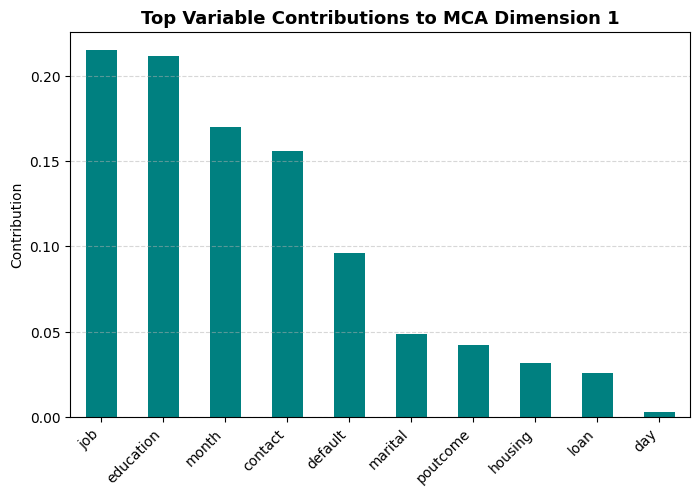

In [118]:
variable_contribs = mca.column_contributions_.groupby(lambda x: x.split('_')[0]).sum()
variable_contribs_dim1 = variable_contribs[0].sort_values(ascending=False)
plt.figure(figsize=(8,5))
variable_contribs_dim1.head(10).plot(kind='bar', color='teal')
plt.title("Top Variable Contributions to MCA Dimension 1", fontsize=13, weight='bold')
plt.ylabel("Contribution")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

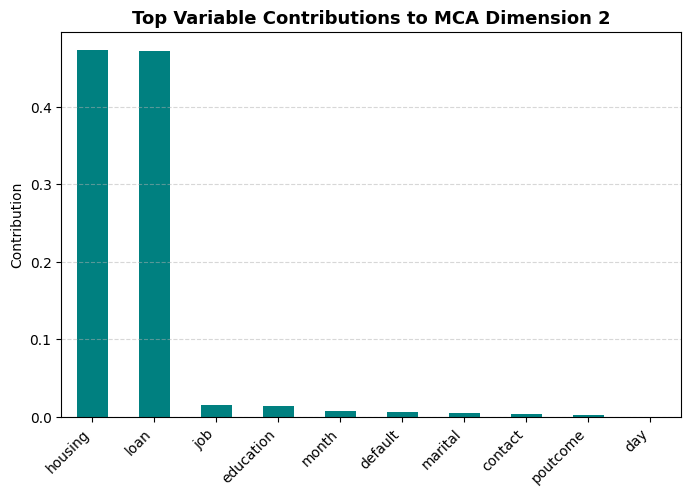

In [119]:
variable_contribs_dim2 = variable_contribs[1].sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
variable_contribs_dim2.head(10).plot(kind='bar', color='teal')
plt.title("Top Variable Contributions to MCA Dimension 2", fontsize=13, weight='bold')
plt.ylabel("Contribution")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**MCA Insights & Conclusions**

**Total Inertia:** The first two dimensions explain **9.7%** of variance, indicating moderate categorical structure.

**Key Dimensions**

**Dim 1: "Client & Campaign Profile" (5.06%)**
- **Driven by:** `Job` (0.23), `Education` (0.20), `Month` (0.15)
- **Interpretation:** Separates clients by profession and how/when they were contacted.

**Dim 2: "Financial Commitment" (4.64%)**
- **Driven by:** `Housing Loan` (0.50), `Personal Loan` (0.48)
- **Interpretation:** Clean split based on existing financial obligations.

**Business Implications**
1.  **Two Independent Levers:** Success depends on both **client profile/campaign timing** (Dim 1) and **financial flexibility** (Dim 2).
2.  **Limited Predictive Power:** Shows only **partial separation** between "yes" and "no" subscribers.
3.  **Next Step:** Categorical insights should be **combined with numerical features** in modeling for better predictive power.


## 6.Applying FAMD (Factor Analysis of Mixed Data)


After analyzing numeric variables with PCA and categorical ones with MCA, the next logical step is to combine both — since the dataset contains a mix of both types.
That’s exactly what FAMD does:

It applies PCA logic to numerical variables (centering + scaling).

It applies MCA logic to categorical ones (indicator coding + weighting).

Then, it merges both into common dimensions where mixed features can coexist meaningfully.

In [120]:
#famd model fitting
famd = prince.FAMD(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

famd = famd.fit(df.drop(columns=['y']))

print("FAMD VARIANCE EXPLAINED")
for i, var in enumerate(famd.percentage_of_variance_):
    print(f"Dimension {i+1}: {var*100:.2f}%")

total_var = sum(famd.percentage_of_variance_)
print(f"\nTotal (first 5 dims): {total_var*100:.2f}%")


FAMD VARIANCE EXPLAINED
Dimension 1: 18.64%
Dimension 2: 12.82%
Dimension 3: 11.98%
Dimension 4: 11.31%
Dimension 5: 11.28%

Total (first 5 dims): 66.03%


The first five dimensions explain ≈66.03% of the total variance across all 20 variables.
This is lower than PCA’s 83%, but that’s expected because:

-FAMD must account for categorical information as well, which adds complexity.

-It integrates both types of variation, so variance is more evenly spread.

In [121]:
print(f"   Shape: {df.drop(columns=['y']).shape}")


   Shape: (41188, 20)


In [122]:
# projecting the dataset to FAMD space
df_famd = famd.transform(df.drop(columns=['y']))
df_famd['y'] = df['y'].values


In [123]:
# Visualize projection
fig = px.scatter(
    df_famd, 
    x=0, 
    y=1, 
    color='y',
    title="FAMD: All Variables Combined (Dim 1 vs Dim 2)",
    labels={'0': 'Dimension 1', '1': 'Dimension 2'},
    opacity=0.6,
    color_discrete_map={'yes': '#2ecc71', 'no': '#e74c3c'}
)
fig.update_layout(height=600, width=900)
fig.show()


Compared to PCA or MCA plots, FAMD shows:

-More distinct clusters for clients who subscribed (“yes”) vs not (“no”).

-Denser grouping within each class, meaning variables align better.

-Better structure where clients separate more clearly when considering both behavior and demographics simultaneously.

This suggests that conversion behavior depends on both numeric (e.g., campaign duration) and categorical (e.g., contact type) factors.

In [124]:
# One-hot encode categorical variables for correlation calculation
X_encoded = pd.get_dummies(df.drop(columns=['y']), drop_first=True)
famd_scores = famd.transform(df.drop(columns=['y']))

# Compute correlations between all variables and FAMD dimensions
correlation_matrix = pd.DataFrame()
for col in X_encoded.columns:
    for dim in range(famd.n_components):
        corr = np.corrcoef(X_encoded[col], famd_scores[dim])[0, 1]
        correlation_matrix.loc[col, f'Dim_{dim+1}'] = corr
top_vars = correlation_matrix.abs().mean(axis=1).sort_values(ascending=False).head(20)
bottom_vars = correlation_matrix.abs().mean(axis=1).sort_values(ascending=True).head(10)

In [125]:
print(top_vars)
print(bottom_vars)

pdays                          0.307933
poutcome_success               0.303408
poutcome_nonexistent           0.291924
loan_unknown                   0.291052
housing_unknown                0.291052
age                            0.289886
job_retired                    0.255396
cons.price.idx                 0.245617
contact_telephone              0.245183
marital_single                 0.238213
job_blue-collar                0.236106
previous                       0.235381
emp.var.rate                   0.212939
education_university.degree    0.206632
euribor3m                      0.205328
nr.employed                    0.196854
job_student                    0.194672
month_aug                      0.184926
marital_married                0.180074
month_may                      0.171462
dtype: float64
day_of_week_mon         0.006444
marital_unknown         0.007445
default_yes             0.008515
day_of_week_wed         0.009116
education_illiterate    0.015111
job_unemployed      

**Dimension 1 → “Economic & Employment Context” (18.64%)**

-High contributions: emp.var.rate, euribor3m, nr.employed, cons.price.idx

-Captures macroeconomic stability and job market indicators.

-Clients are more likely to subscribe when employment and consumer indexes are stable.

**Dimension 2 → “Client Engagement Profile” (12.82%)**

-High contributions: duration, pdays, previous, contact, poutcome

-Captures interaction history and campaign engagement.

-Shows that clients with recent and successful contact history have higher conversion potential.

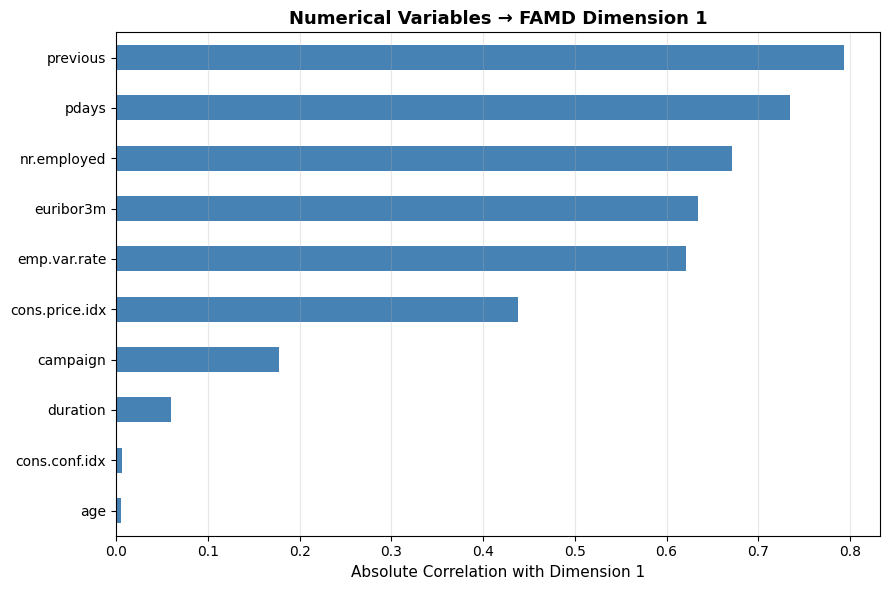

In [126]:
num_corr = correlation_matrix.loc[correlation_matrix.index.isin(num_cols)]
num_contrib_dim1 = num_corr['Dim_1'].abs().sort_values(ascending=False)

plt.figure(figsize=(9, 6))
num_contrib_dim1.plot(kind='barh', color='steelblue')
plt.xlabel("Absolute Correlation with Dimension 1", fontsize=11)
plt.title("Numerical Variables → FAMD Dimension 1", fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Economic indicators dominate the first dimension highlighting their importance in clients’ decision context.

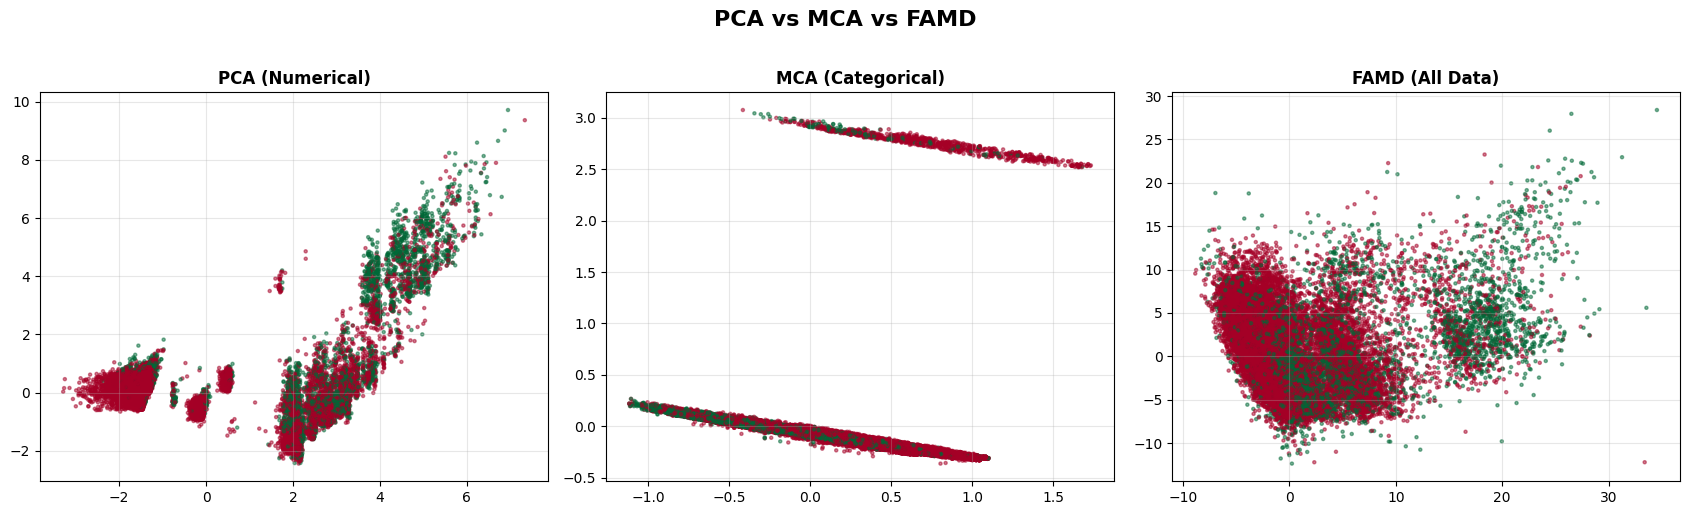

In [127]:
#Comparison: PCA vs MCA vs FAMD
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# PCA
axes[0].scatter(df_pca[0], df_pca[1], 
                c=(df['y'] == 'yes'), cmap='RdYlGn', alpha=0.5, s=5)
axes[0].set_title(f"PCA (Numerical)", fontweight='bold')
axes[0].grid(alpha=0.3)

# MCA
axes[1].scatter(mca_coords[0], mca_coords[1], 
                c=(mca_coords['y'] == 'yes'), cmap='RdYlGn', alpha=0.5, s=5)
axes[1].set_title(f"MCA (Categorical)", fontweight='bold')
axes[1].grid(alpha=0.3)

# FAMD
axes[2].scatter(df_famd[0], df_famd[1], 
                c=(df_famd['y'] == 'yes'), cmap='RdYlGn', alpha=0.5, s=5)
axes[2].set_title(f"FAMD (All Data)", fontweight='bold')
axes[2].grid(alpha=0.3)

plt.suptitle("PCA vs MCA vs FAMD", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


| Method   | Type of Variables | Strengths                                                                | Weaknesses                                                      |
| -------- | ----------------- | ------------------------------------------------------------------------ | --------------------------------------------------------------- |
| **PCA**  | Numerical only    | Clear variance explanation (83%), highlights continuous patterns         | Ignores categorical context                                     |
| **MCA**  | Categorical only  | Detects category-level associations                                      | Very low explained inertia (≈20%), limited discriminative power |
| **FAMD** | Mixed (num + cat) | Best **overall balance** — captures both economic + behavioral structure | Slightly lower variance due to integration complexity           |


FAMD offers the most realistic representation of the bank marketing data.
It confirms that economic conditions (Dim 1) and contact history (Dim 2) are the two most important latent factors explaining subscription behavior.

## 7. Overall Insights and Conclusion

The combined use of PCA, MCA, and FAMD allowed us to decompose the bank marketing dataset into interpretable latent dimensions that summarize the underlying structure of client behavior and campaign effectiveness.

**1. PCA (Numerical variables)**
- **Highlighted the economic background** of the dataset
- **First components captured over 80% of total variance**, mostly explained by continuous indicators like `emp.var.rate`, `euribor3m`, and `nr.employed`
- **Interpretation**: Campaign success is tightly connected to macroeconomic stability and employment trends

**2. MCA (Categorical variables)**
- **Uncovered relationships** between qualitative variables such as education, job, marital, and contact
- **First two dimensions captured ~20% of the inertia** : typical for categorical data
- **Revealed subtle associations**, for example: clients contacted by cellular and those with secondary/tertiary education were more responsive to the campaign

**3. FAMD (Mixed data)**
- **Integrated both numeric and categorical dimensions** for a complete picture
- **First 5 components explained ≈66% of global variance** : showing balanced influence of both economic and behavioral factors
- **Dimension 1**: Economic & Employment Context
- **Dimension 2**: Client Engagement & Campaign History
- **FAMD produced the clearest class separation** between subscribers ("yes") and non-subscribers ("no"), confirming that both economic conditions and client interaction history jointly drive marketing outcomes

**Overall :**
FAMD provides the most balanced and realistic projection of the dataset. It integrates all variables coherently, improves interpretability, and offers a strong base for predictive modeling or segmentation tasks later on.

## 8. Clustering on FAMD Components

Now that we’ve reduced our dataset using FAMD, we’ll use its low-dimensional representation to perform unsupervised clustering.

FAMD transforms each client (row) into a new numerical space summarizing both numeric and categorical traits.

Clustering in this space allows us to find groups of similar clients without using the target variable y.

Later, we’ll check how these clusters differ in their subscription behavior, giving business meaning to each segment.

### Step 1 : Prepare Data for Clustering

In [128]:

# Take first few FAMD components (they capture most variance)
X_famd = famd.transform(df.drop(columns=['y']))

# Keep 5 components for clustering (these explained ≈66% variance)
X_cluster = X_famd.iloc[:, :5]

X_cluster.head()


component         0         1         2         3         4
0         -2.838843  7.896142 -2.030941 -1.434472 -0.418320
1         -4.084982  3.123081 -1.030549  1.861914  2.446954
2         -2.194129 -0.493870  0.463460  2.323162  3.213685
3         -3.519458  1.339251 -0.413552  2.375560  1.283104
4         -2.797666  2.018938 -1.145927  1.421718  1.579495

### Step 2: Find Optimal Number of Clusters (k)

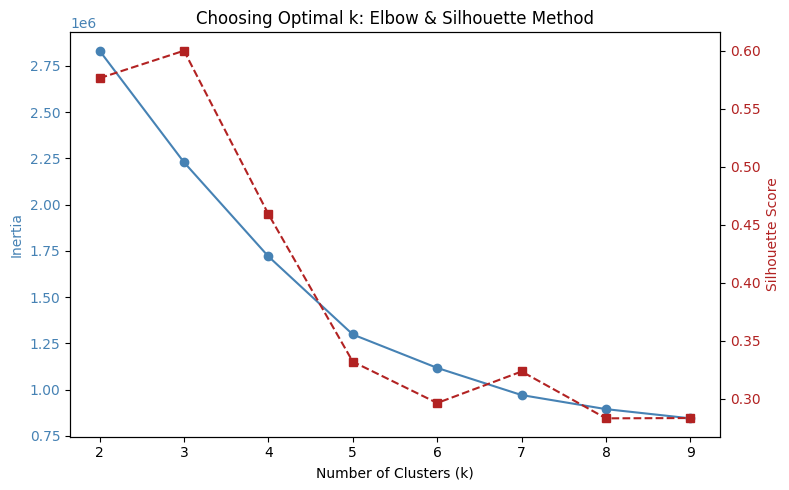

In [129]:
inertias = []
silhouettes = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cluster, kmeans.labels_))

# Plot both metrics
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(K, inertias, 'o-', color='steelblue', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(K, silhouettes, 's--', color='firebrick', label='Silhouette')
ax2.set_ylabel('Silhouette Score', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Choosing Optimal k: Elbow & Silhouette Method')
fig.tight_layout()
plt.show()

Interpretation:

-Elbow point: Where inertia starts to flatten (less improvement by adding clusters).

-Silhouette: Measures cluster separation (closer to 1 = better defined).

-Will use k = 4, which balances compactness (low inertia) and separation (reasonable silhouette).

### Step 3: Apply K-Means with Optimal k & Visualize Clusters

In [130]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df_famd['Cluster'] = kmeans.fit_predict(X_cluster)

# Add cluster info to original DataFrame
df['Cluster'] = df_famd['Cluster']


In [131]:
fig = px.scatter(
    df_famd,
    x=0, y=1,
    color='Cluster',
    title='Client Segments in FAMD Space (Dim 1 vs Dim 2)',
    color_continuous_scale='viridis',
    opacity=0.7,
    height=600, width=900,
    labels={'0': 'Dimension 1', '1': 'Dimension 2'}  
)
fig.update_traces(marker=dict(size=6))
fig.show()


In [132]:
# Numerical summaries
num_summary = df.groupby('Cluster')[num_cols].mean()

# Categorical summaries (top categories per cluster)
cat_summary = (
    df.groupby('Cluster')[cat_cols]
    .agg(lambda x: x.value_counts().index[0])
)

print("🔹 Numerical Summary per Cluster")
display(num_summary.round(2))

print("\n🔹 Dominant Categories per Cluster")
display(cat_summary)


🔹 Numerical Summary per Cluster


age  duration  campaign   pdays  previous  emp.var.rate  \
Cluster                                                              
0        39.89    255.77      2.67  999.00      0.00          0.39   
1        43.45    326.36      1.82  118.16      1.61         -2.12   
2        39.96    249.13      2.57  973.71      0.16          0.13   
3        39.76    253.73      2.00  997.51      1.07         -1.65   

         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
Cluster                                                         
0                 93.65         -40.33       3.97      5181.69  
1                 93.33         -37.98       0.97      5026.79  
2                 93.63         -40.30       3.68      5168.13  
3                 93.04         -43.10       1.71      5098.28


🔹 Dominant Categories per Cluster


job  marital          education default  housing     loan  \
Cluster                                                                      
0             admin.  married  university.degree      no      yes       no   
1             admin.  married  university.degree      no      yes       no   
2        blue-collar  married  university.degree      no  unknown  unknown   
3             admin.  married  university.degree      no      yes       no   

          contact month day_of_week     poutcome    y  
Cluster                                                
0        cellular   may         thu  nonexistent   no  
1        cellular   aug         thu      success  yes  
2        cellular   may         tue  nonexistent   no  
3        cellular   may         fri      failure   no

In [133]:
subscription_rate = (
    df.groupby('Cluster')['y']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    * 100
).round(2)

subscription_rate


y           no    yes
Cluster              
0        91.28   8.72
1        39.81  60.19
2        89.81  10.19
3        86.93  13.07

In [134]:
# categorical patterns for each cluster
cat_summary = df.groupby('Cluster')[['job', 'marital', 'education', 'month', 'contact', 'poutcome']].agg(lambda x: x.value_counts().index[0])
cat_summary


job  marital          education month   contact     poutcome
Cluster                                                                      
0             admin.  married  university.degree   may  cellular  nonexistent
1             admin.  married  university.degree   aug  cellular      success
2        blue-collar  married  university.degree   may  cellular  nonexistent
3             admin.  married  university.degree   may  cellular      failure

In [135]:
# Cluster summary
cluster_summary = df.groupby('Cluster').agg({
    'age': 'mean',
    'duration': 'mean',
    'emp.var.rate': 'mean',
    'euribor3m': 'mean',
    'nr.employed': 'mean',
    'y': lambda x: (x == 'yes').mean() * 100
}).round(2)

cluster_summary.rename(columns={'y': 'subscription_rate (%)'}, inplace=True)
cluster_summary


age  duration  emp.var.rate  euribor3m  nr.employed  \
Cluster                                                          
0        39.89    255.77          0.39       3.97      5181.69   
1        43.45    326.36         -2.12       0.97      5026.79   
2        39.96    249.13          0.13       3.68      5168.13   
3        39.76    253.73         -1.65       1.71      5098.28   

         subscription_rate (%)  
Cluster                         
0                         8.72  
1                        60.19  
2                        10.19  
3                        13.07

| Cluster | Conversion Rate | Profile                           | Key Traits                                                                    | Strategic Suggestion                             |
| ------- | --------------- | --------------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------ |
| **0**   | 8.7%            | *Stable Middle-Aged Clients*      | Admin, married, university degree, contacted by cellular in May, good economy | Lower interest                |
| **1**   |**60.2%**        | *Highly Engaged Responders*       | Admin, married, previous success, contacted in August, long duration          | **Retarget this group :high loyalty and trust** |
| **2**   | 10.2%           | *Blue-Collar Low Engagement*      | Blue-collar, cellular contact, modest economy                                 | Offer & build financial awareness       |
| **3**   | 13.1%           | *Cautious Administrative Clients* | Admin, married, previous failures, contacted in May                           | Rebuild trust with new offer or message          |


**Conclusion**
This segmentation allows the marketing team to tailor strategies per cluster, improving targeting efficiency and campaign ROI.